<a href="https://colab.research.google.com/github/tanvirrahmanaz/SMS-Spam-Classifier-Model/blob/main/SMS_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading datasets from my Google Drive

In [1]:
! gdown --id 1KkaIrtTyD_BbKMqAXxMIii9ybL8Ih10s

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KkaIrtTyD_BbKMqAXxMIii9ybL8Ih10s
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 83.0MB/s]


#Import all packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Import data set

In [3]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [4]:
df.shape

(5572, 5)

#Data Cleaning

In [5]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
column_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns = column_to_drop, axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
new_column_names = {'v1': 'label', 'v2': 'text'}
df.rename(columns=new_column_names, inplace=True)

In [10]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

#Exploratory data analysis

In [14]:
label_mapping = {'ham': 0, 'spam': 1}

df['label'] = df['label'].map(label_mapping)

In [15]:
df.label.value_counts()

0    4516
1     653
Name: label, dtype: int64

In [16]:
label_distribution = df['label'].value_counts(normalize=True) * 100

print(label_distribution)

0    87.366996
1    12.633004
Name: label, dtype: float64


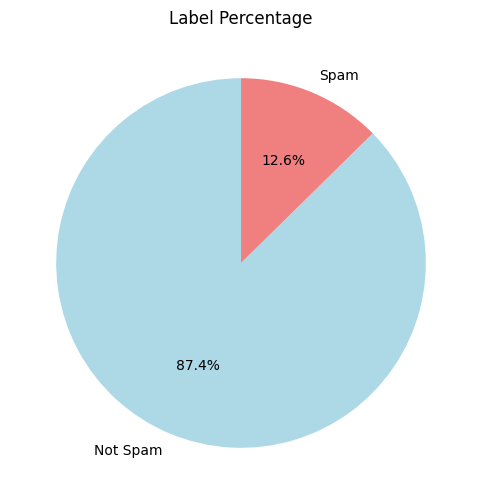

In [17]:
label_counts = df['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels= ["Not Spam","Spam"], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Label Percentage')
plt.show()

In [18]:
nltk.download('punkt')

df["No_of_Characters"] = df["text"].apply(len)
df["No_of_Words"] = df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
df["No_of_Sentences"] = df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
df

,label,text,No_of_Characters,No_of_Words,No_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
df.describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
label,5169.000000,0.126330,0.332253,0.000000,0.000000,0.000000,0.000000,1.000000
No_of_Characters,5169.000000,78.977945,58.236293,2.000000,36.000000,60.000000,117.000000,910.000000
No_of_Words,5169.000000,18.455794,13.324758,1.000000,9.000000,15.000000,26.000000,220.000000
No_of_Sentences,5169.000000,1.965564,1.448541,1.000000,1.000000,1.000000,2.000000,38.000000


In [21]:
df[df['label'] == 1][['No_of_Characters','No_of_Words','No_of_Sentences']].describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,653.000000,137.891271,30.137753,13.000000,132.000000,149.000000,157.000000,224.000000
No_of_Words,653.000000,27.667688,7.008418,2.000000,25.000000,29.000000,32.000000,46.000000
No_of_Sentences,653.000000,2.970904,1.488425,1.000000,2.000000,3.000000,4.000000,9.000000


In [22]:
df[df['label'] == 0][['No_of_Characters','No_of_Words','No_of_Sentences']].describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,4516.000000,70.459256,56.358207,2.000000,34.000000,52.000000,90.000000,910.000000
No_of_Words,4516.000000,17.123782,13.493970,1.000000,8.000000,13.000000,22.000000,220.000000
No_of_Sentences,4516.000000,1.820195,1.383657,1.000000,1.000000,1.000000,2.000000,38.000000


#Data Preprocessing

In [23]:
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase (example : "HuGGing FACE"--> "hugging face")
    text = text.lower()

    # Tokenization ( example : [How are you man?]--> ['How','are','you','man'])
    tokens = word_tokenize(text)

    # Remove special characters and punctuation (example : @,#,% ..etc)
    tokens = [token for token in tokens if token.isalnum()]

    # Remove stop words example (to, why .. etc)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming example (dancing --> danc)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
df['trnsfrd_text'] = df['text'].apply(preprocess_text)

#Model Building

In [25]:
#Vectorize the text

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3500)

In [26]:
x = tfidf.fit_transform(df['trnsfrd_text']).toarray()

In [27]:
x1 = cv.fit_transform(df['trnsfrd_text']).toarray()

In [28]:
y = df['label'].values

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=2)

In [30]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bnb = BernoulliNB()
gnb = GaussianNB()

In [31]:
classifier = {
    'Support Vector Classifier' : svc,
    'KNeighborsClassifier' : knc,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier':xgb,
    'BernoulliNB' : bnb,
    'GaussianNB' : gnb
}

In [32]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)

    return accuracy,precision,confusion

In [33]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354,
 0.9747899159663865,
 array([[893,   3],
        [ 22, 116]]))

In [34]:
accuracy_scores = []
precision_scores = []
confusion_scores = []

for name, clf in classifier.items():

    current_accuracy, current_precision,confusion_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Confusion - ", confusion_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    confusion_scores.append(confusion_precision)


For  Support Vector Classifier
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Confusion -  [[893   3]
 [ 22 116]]
For  KNeighborsClassifier
Accuracy -  0.9052224371373307
Precision -  1.0
Confusion -  [[896   0]
 [ 98  40]]
For  MultinomialNB
Accuracy -  0.9700193423597679
Precision -  1.0
Confusion -  [[896   0]
 [ 31 107]]
For  DecisionTreeClassifier
Accuracy -  0.9264990328820116
Precision -  0.81
Confusion -  [[877  19]
 [ 57  81]]
For  LogisticRegression
Accuracy -  0.9545454545454546
Precision -  0.9595959595959596
Confusion -  [[892   4]
 [ 43  95]]
For  RandomForestClassifier
Accuracy -  0.971953578336557
Precision -  0.990990990990991
Confusion -  [[895   1]
 [ 28 110]]
For  AdaBoostClassifier
Accuracy -  0.9671179883945842
Precision -  0.9814814814814815
Confusion -  [[894   2]
 [ 32 106]]
For  BaggingClassifier
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
Confusion -  [[878  18]
 [ 26 112]]
For  ExtraTreesClassifier
Accuracy -  0.97969052224

In [35]:
performance_df = pd.DataFrame({'Algorithm':classifier.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Confusion':confusion_scores}).sort_values('Accuracy',ascending=False)

In [41]:
performance_df

,Algorithm,Accuracy,Precision,Confusion
11,BernoulliNB,0.981625,0.991736,"[[895, 1], [18, 120]]"
8,ExtraTreesClassifier,0.979691,0.975610,"[[893, 3], [18, 120]]"
0,Support Vector Classifier,0.975822,0.974790,"[[893, 3], [22, 116]]"
5,RandomForestClassifier,0.971954,0.990991,"[[895, 1], [28, 110]]"
2,MultinomialNB,0.970019,1.000000,"[[896, 0], [31, 107]]"
6,AdaBoostClassifier,0.967118,0.981481,"[[894, 2], [32, 106]]"
10,XGBClassifier,0.965184,0.925000,"[[887, 9], [27, 111]]"
7,BaggingClassifier,0.957447,0.861538,"[[878, 18], [26, 112]]"
4,LogisticRegression,0.954545,0.959596,"[[892, 4], [43, 95]]"
9,GradientBoostingClassifier,0.947776,0.928571,"[[889, 7], [47, 91]]"


In [38]:
accuracy_scoresx1 = []
precision_scoresx1 = []
confusion_scoresx1 = []

for name, clf in classifier.items():

    current_accuracyx1, current_precisionx1,confusion_precisionx1 = train_classifier(clf, x1_train, y_train, x1_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracyx1)
    print("Precision - ", current_precisionx1)
    print("Confusion - ", confusion_precisionx1)

    accuracy_scores.append(accuracy_scoresx1)
    precision_scores.append(precision_scoresx1)
    confusion_scores.append(confusion_scoresx1)

For  Support Vector Classifier
Accuracy -  0.9264990328820116
Precision -  0.7421875
Confusion -  [[863  33]
 [ 43  95]]
For  KNeighborsClassifier
Accuracy -  0.9061895551257253
Precision -  1.0
Confusion -  [[896   0]
 [ 97  41]]
For  MultinomialNB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
Confusion -  [[871  25]
 [ 12 126]]
For  DecisionTreeClassifier
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
Confusion -  [[892   4]
 [ 72  66]]
For  LogisticRegression
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
Confusion -  [[893   3]
 [ 27 111]]
For  RandomForestClassifier
Accuracy -  0.971953578336557
Precision -  1.0
Confusion -  [[896   0]
 [ 29 109]]
For  AdaBoostClassifier
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
Confusion -  [[890   6]
 [ 32 106]]
For  BaggingClassifier
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
Confusion -  [[886  10]
 [ 29 109]]
For  ExtraTreesClassifier
Accuracy -  0.97678

#Best Model Save

In [55]:
performance_df

,Algorithm,Accuracy,Precision,Confusion
11,BernoulliNB,0.981625,0.991736,"[[895, 1], [18, 120]]"
8,ExtraTreesClassifier,0.979691,0.975610,"[[893, 3], [18, 120]]"
0,Support Vector Classifier,0.975822,0.974790,"[[893, 3], [22, 116]]"
5,RandomForestClassifier,0.971954,0.990991,"[[895, 1], [28, 110]]"
2,MultinomialNB,0.970019,1.000000,"[[896, 0], [31, 107]]"
6,AdaBoostClassifier,0.967118,0.981481,"[[894, 2], [32, 106]]"
10,XGBClassifier,0.965184,0.925000,"[[887, 9], [27, 111]]"
7,BaggingClassifier,0.957447,0.861538,"[[878, 18], [26, 112]]"
4,LogisticRegression,0.954545,0.959596,"[[892, 4], [43, 95]]"
9,GradientBoostingClassifier,0.947776,0.928571,"[[889, 7], [47, 91]]"


In [ ]:
"""
Support Vector Classifier
KNeighborsClassifier
MultinomialNB
DecisionTreeClassifier
LogisticRegression
RandomForestClassifier
AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
XGBClassifier
BernoulliNB
GaussianNB
"""

In [54]:
def download_model(selected_model):
    if selected_model in classifier:
        model = classifier[selected_model]
        with open(f'{selected_model}.pkl', 'wb') as file:
            pickle.dump(model, file)
        return f'Model saved as {selected_model}.pkl'
    else:
        return 'Invalid model name'


selected_model = input("Which model do you want? \n")
result = download_model(selected_model)
print(result)

Which model do you want? 
GaussianNB
Model saved as GaussianNB.pkl
